In [23]:
# This is a summary notebooks showcasing the main results of the project that can be explored and commented along with the provided codes
from IPython.display import Image
import os
import ipyplot

current_dir = os.getcwd()
figures = os.path.join(current_dir, 'figures')

ModuleNotFoundError: No module named 'ipyplot'

In [15]:
# %% 
# In this project we consider some common Reinforcement learning algorithms used in Yawning Titan, abstract graph network simulator, evaluating the performances
# such agents while modifying the network status. Furthermore we focus on the zero-shot deployment of agents from training in synthetic networks to 
# realistic environments.
# 
# The scope of this document is to showcase the main functions and documents already present in the repository that can 

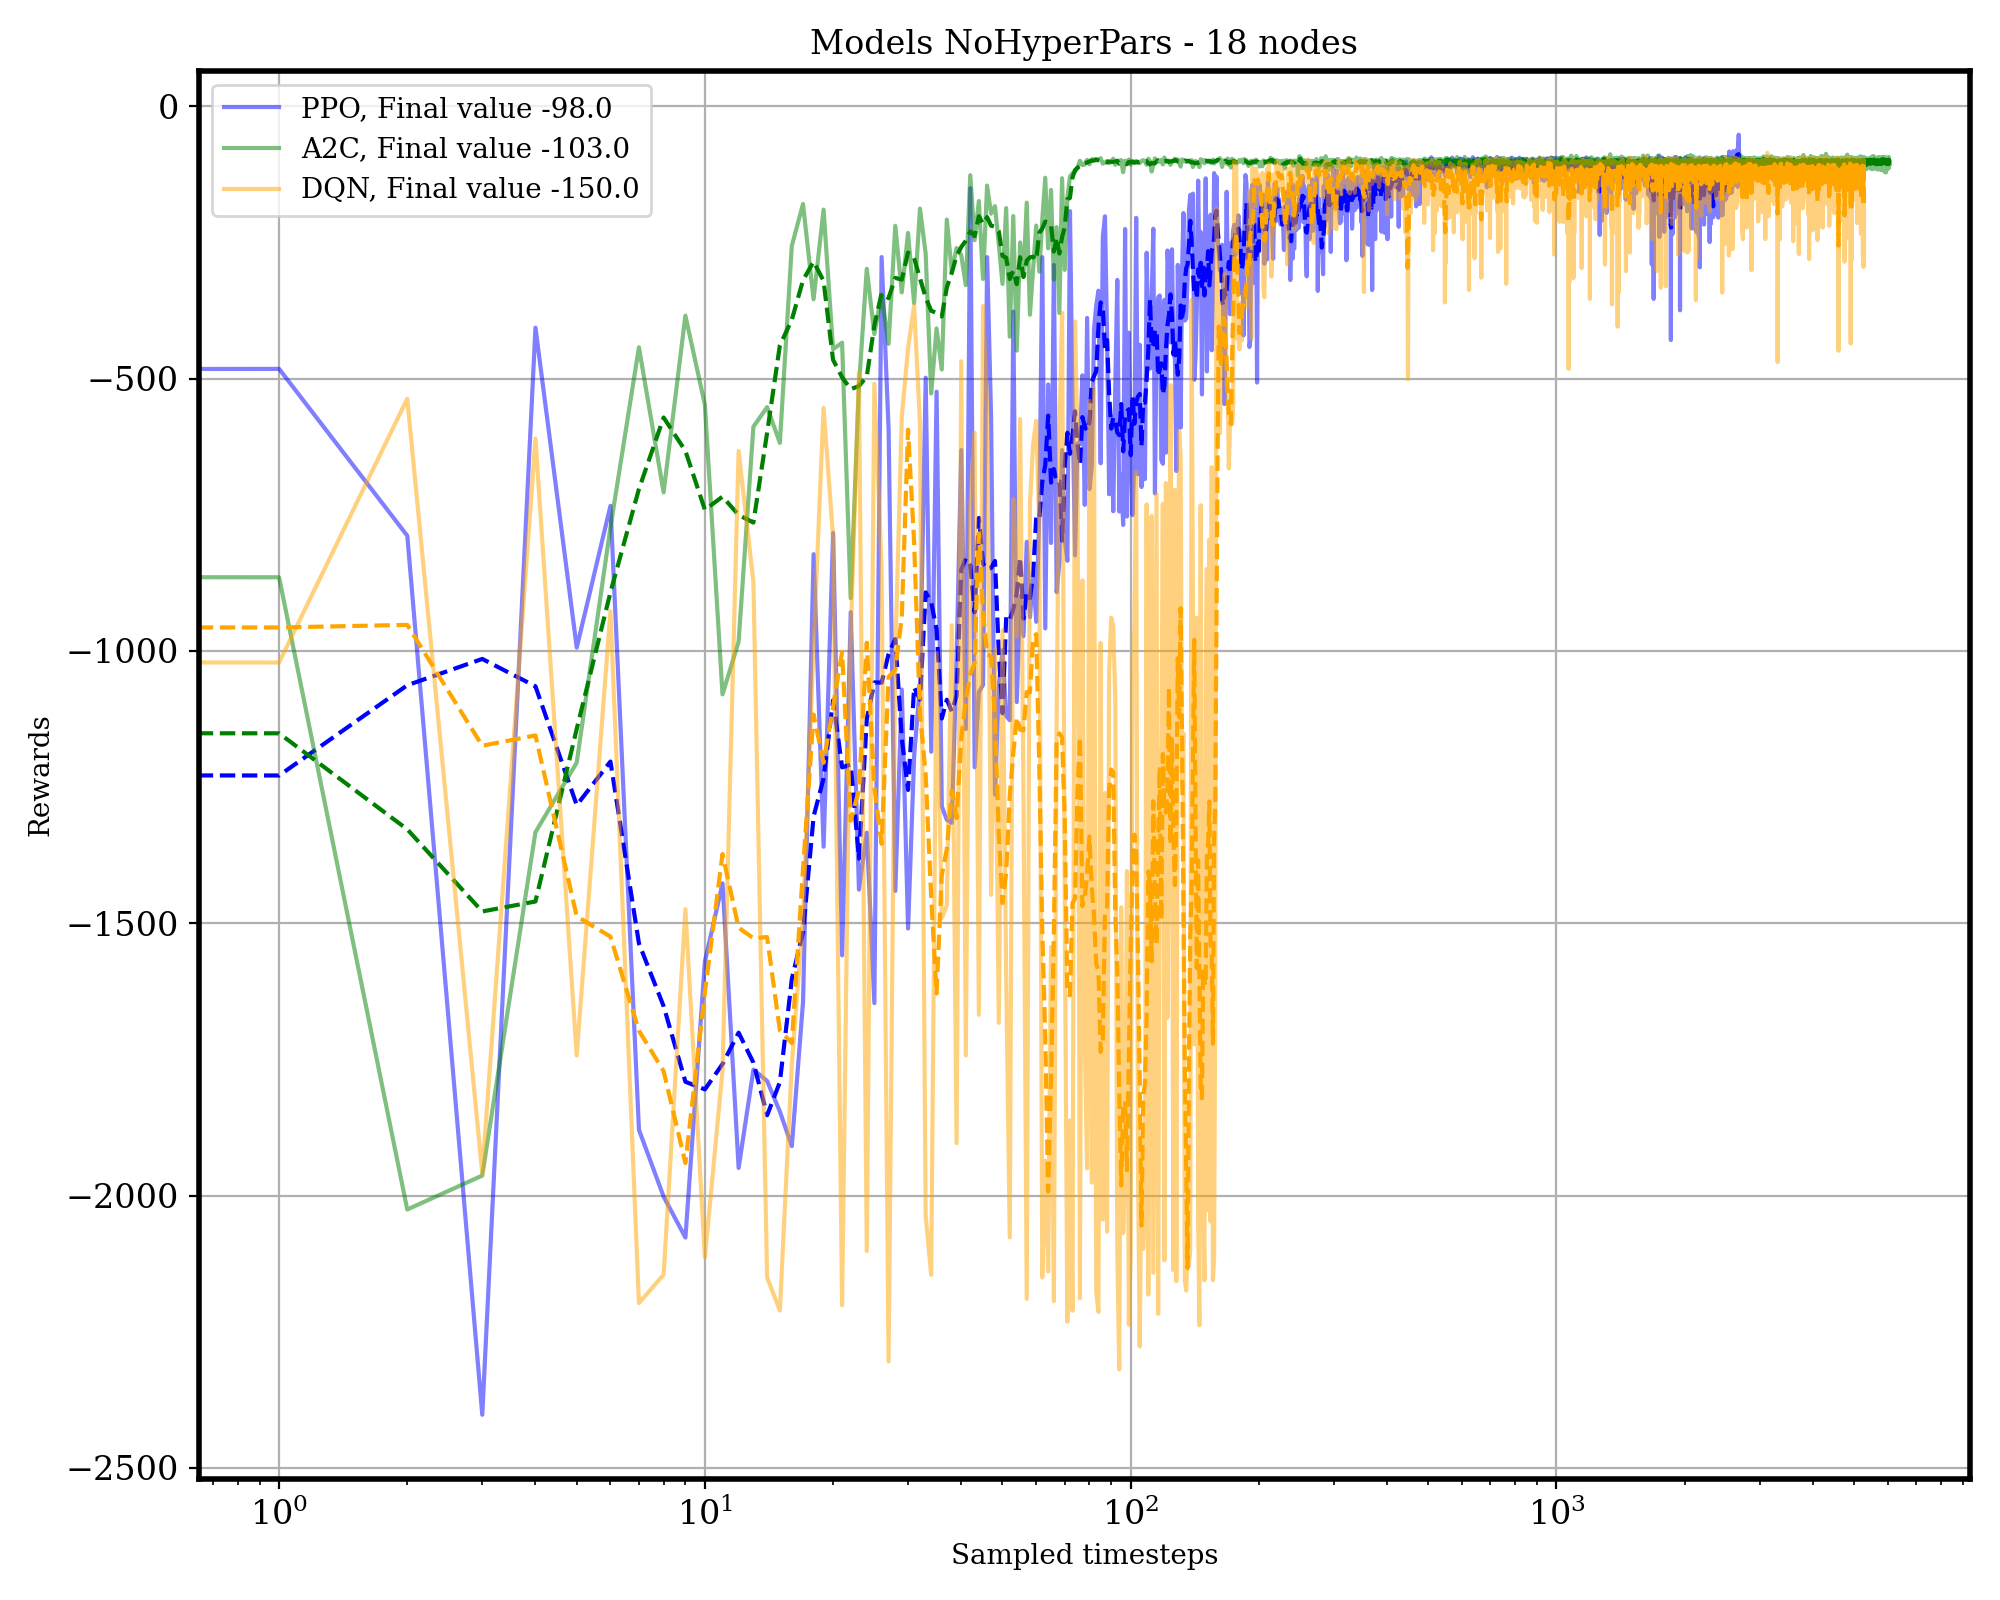

In [17]:
# %% Show the training performances of the various algorithms
# We have trained (and you can train them too using the code train_agents.py) and we want to see the training performances, so when they have converged to an
# optimal solution and how are the rewards obtained while converging.
# Using the code provided show training performances it is possible to see the training curve of the various agents, while changing
# the network size and the hyper parameters.
Image(os.path.join(figures, 'training_performances_18_nodes_NoHyperPars.png'))

In [21]:
## Plot description
# In the first example we can see the case of the 18 nodes network and we compare three different algorithms, PPO, A2C and DQN with 
# no changes in the standard hyperparameters, the values are kept the same as the lybrary default (Stable-Baselines3).
# We show in three different colors the three algorithms: 
# - blue for PPO
# - green for A2c
# - yellow for DQN
# The sampled timesteps is a measure of how long did the simulation take to converge, every timestep is composed of 50 environment evaluations. 
# The y-axis shows the rewards per episode.
# The dashed line is the running mean of the rewards shown. In the legend we present the final reward scored by each algorithm to give an idea how what are the
# final scores, the condition to stop the training was that no improvement was recorded after 3 consecutive evaluations.
# It's possible to note that all three algorithms improve the rewards across the timesteps showing that the agent is learning a policy
# to stop the red agent spread or counteracting such actions. In this case we show the 18 nodes case but below we show the 50 and 100 nodes as well.

In [22]:
# create a list of images
image_list = [os.path.join(figures, 'training_performances_50_nodes_NoHyperPars.png'), 
             os.path.join(figures, 'training_performances_100_nodes_NoHyperPars.png')]
# show the images
ipyplot.plot_images(image_list, max_images=2, img_width=150)

NameError: name 'ipyplot' is not defined